<ipython-input-5-603b41c4ce20>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



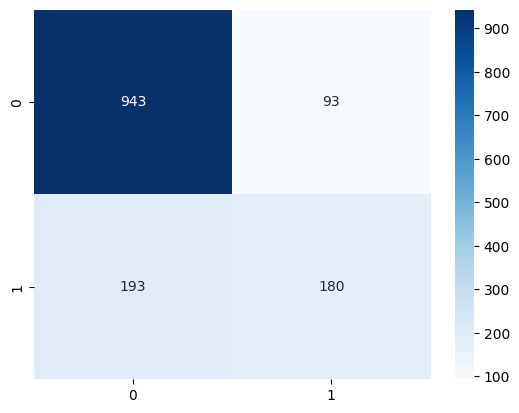

In [5]:
# Customer Churn Prediction Project

## Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


## Step 2: Load Dataset
def load_data(file_path):
    return pd.read_csv(file_path)


## Step 3: Preprocess Data
def preprocess_data(data):
    # Handle missing values
    data.fillna(method='ffill', inplace=True)

    # Encode categorical features
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

    return data, label_encoders


## Step 4: Split Data
def split_data(data, target_column):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Train Model
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model


## Step 6: Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()


## Step 7: Save Model
def save_model(model, file_path):
    import joblib
    joblib.dump(model, file_path)


## Step 8: Main Workflow
def main():
    # Load data
    data = load_data('/content/raw_data.csv')

    # Preprocess data
    data, encoders = preprocess_data(data)

    # Split data
    X_train, X_test, y_train, y_test = split_data(data, target_column='Churn')

    # Train model
    model = train_model(X_train, y_train)

    # Evaluate model
    evaluate_model(model, X_test, y_test)




if __name__ == '__main__':
    main()